# Preproceccing

Removing n.a.

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
realty_data = pd.read_csv('data.csv',index_col=0)

In [296]:
realty_df = realty_data.copy()

In [297]:
realty_df['Город'] = realty_df['Адрес'].str.split(',').str[0]
realty_df = realty_df[realty_df['Город']=='Москва']
realty_df.drop('Город',axis=1, inplace=True)

In [298]:
realty_df.head()

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


In [299]:
realty_df.isna().sum()

ID  объявления                  0
Количество комнат             535
Тип                             0
Метро                         346
Адрес                           0
Площадь, м2                     0
Дом                             0
Парковка                    11174
Цена                            0
Телефоны                        0
Описание                        0
Ремонт                       2463
Площадь комнат, м2           7228
Балкон                       6630
Окна                         5150
Санузел                      2041
Можно с детьми/животными     4915
Дополнительно                 272
Название ЖК                 15281
Серия дома                  17646
Высота потолков, м           9202
Лифт                         4192
Мусоропровод                 8007
Ссылка на объявление            0
dtype: int64

**1. Количество комнат**

1041 пропущенное значение. 

Запись состоит из числа комнат и типа - смежный/изолированный. Тип отсутсвует в более чем половине записей. Восстановить его по другим данным невожможно, предлагаем опустить, оставив только число комнат.

Для заполнения пропущенных значений, изучим зависимость площади квартиры и количества комнат:

In [300]:
realty_df['Количество комнат'] = realty_df['Количество комнат'].apply(lambda x: int(x[0]) if type(x) is str else x)
realty_df['Площадь, м2'] = realty_df['Площадь, м2'].apply(lambda x: float(x[:x.find('/')]) if type(x) is str else x)
fig = px.scatter(x=realty_df['Площадь, м2'], y=realty_df['Количество комнат'])
fig.show()


На графике заметно, что площадь квартиры и количество комнат взяимосвязвно

In [301]:
realty_df[realty_df['Количество комнат'].isna()]['Площадь, м2'].sort_values()

1556      10.0
11245     11.0
6313      11.0
6282      12.0
9559      12.0
         ...  
14382     70.0
14259     75.0
10622     78.0
6751      86.3
757      120.0
Name: Площадь, м2, Length: 535, dtype: float64

In [302]:
rooms = pd.DataFrame()
rooms['mean'] = realty_df.groupby('Количество комнат')['Площадь, м2'].mean()
rooms['q1'] = realty_df.groupby('Количество комнат')['Площадь, м2'].quantile(q=0.25)
rooms['median'] = realty_df.groupby('Количество комнат')['Площадь, м2'].median()
rooms['q3'] = realty_df.groupby('Количество комнат')['Площадь, м2'].quantile(q=0.75)
rooms

,mean,q1,median,q3
Количество комнат,,,,
1.0,36.989809,34.00,38.0,40.00
2.0,54.325638,45.00,52.0,60.00
3.0,88.677437,68.00,80.0,102.00
4.0,149.257765,115.00,145.0,180.00
5.0,215.217417,175.00,206.0,240.00
6.0,343.264844,257.25,330.0,379.25


Посчитав средние, медианы и межквартильные интервалы площади для квартир с различным количеством комнат, мы можем предположить, что если площадь квартиры попадает в интервал, то скорее всего, в ней соотвествующее количетсво комнат. 

Квартили при этом не пересекаются. В таких случаях в качестве границы будем брать среднее между верхним и нижним. Самая большая квартира без указания числа комнат попадает в категорию 4-ех комнатных. 

In [303]:
def get_room_num(size): 
    if size < 42.5: return 1
    elif size < 64: return 2
    elif size < 108.5: return 3
    else: return 4
guess_sizes = realty_df[realty_df['Количество комнат'].isna()]['Площадь, м2'].apply(get_room_num)
realty_df['Количество комнат'].fillna(guess_sizes, inplace=True)
realty_df['Количество комнат'].value_counts()

Количество комнат
2.0    7431
1.0    7157
3.0    3676
4.0    1012
5.0     333
6.0     128
Name: count, dtype: int64

**2. Метро**

346 пропущенных значений. 

Запись состоит из станциии и оценки расстояния. Необходимо разделить на два разных признака. 

Восстановление станции метро возможно по ардесу. 

Вместо оценки времени пешком до станции будем использовать расстояние до нее, так как данный признак возможно восполнить.

In [304]:
realty_df['Метро'] = realty_df['Метро'].apply(lambda x: x[3:x.find('(')-1] if type(x) is str else x)

Поскольку нам известны все адреса, будем заполнять пропущенные значение ближайшей станцией метро. 

In [305]:
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic
geolocator = Nominatim(user_agent="Tester")

In [306]:
metro_info = pd.read_excel('metro_coordinates.xlsx',index_col=0)
metro_info.head()

,Station,Latitude,Longitude,Line,AdmArea,District
0,Бульвар Рокоссовского,55.814722,37.734167,Сокольническая линия,Восточный административный округ,район Богородское
1,Черкизовская,55.803889,37.744722,Сокольническая линия,Восточный административный округ,район Преображенское
2,Преображенская площадь,55.796389,37.715000,Сокольническая линия,Восточный административный округ,район Преображенское
3,Сокольники,55.788889,37.680278,Большая кольцевая линия,Восточный административный округ,район Сокольники
4,Красносельская,55.780000,37.667222,Сокольническая линия,Центральный административный округ,Красносельский район


In [307]:
def find_closest_station(adr): 
    if 'Зеленоград' in adr: # так быстрее
        return 'Нет метро поблизости'
    location = geolocator.geocode(adr)
    point_1 = location.latitude, location.longitude
    results = []
    for i in metro_info.index:
        point_2 = metro_info['Latitude'][i], metro_info['Longitude'][i]
        distance = geodesic(point_1, point_2).meters
        results.append([metro_info['Station'][i],distance])
    closest = min(results, key=lambda x: x[1])
    if closest[1] > 5000: 
        return 'Нет метро поблизости'
    else: 
        return closest[0]


In [309]:
# длинные адреса с километрами МКАД не работают, убираем их
def clean_mkad(adr): 
    if 'ш.' in adr: 
        return adr[:adr.find('ш.')-2]
    elif ', пос. Внуково' in adr: 
        return adr.replace(', пос. Внуково','')
    elif 'Москва, Дмитровское шоссе, 165Д' in adr:
        return 'Москва, Дмитровское шоссе, 165Д'
    elif 'Москва, Дмитровское шоссе, 165Е' in adr:
        return 'Москва, Дмитровское шоссе, 165Е'
    else: 
        return adr
realty_df['Адрес'] = realty_df['Адрес'].apply(clean_mkad)
# эти адреса тоже все ломали я не придумал как их массово выцепить
realty_df.loc[realty_df.Адрес == 'Москва, Дмитровское шоссе, 122Гк1', 'Адрес'] = 'Москва, Дмитровское шоссе, 122Г'
realty_df.loc[realty_df.Адрес == 'Москва, Автозаводская улица, 23Бк2', 'Адрес'] = 'Москва, Автозаводская улица, 23Б'
realty_df.loc[realty_df.Адрес == 'Москва, Северное Чертаново мкр, 1Ак1', 'Адрес'] = 'Москва, Северное Чертаново'
realty_df.loc[realty_df.Адрес == 'Москва, Юго-Восточный ао, Кузьминки р-н, Волжский Бульвар 114А кв-л, к6', 'Адрес'] = 'Москва, Волжский Бульвар 114А'
realty_df.loc[realty_df.Адрес == 'Москва, Дмитровское шоссе, 107Ак1', 'Адрес'] = 'Москва, Дмитровское шоссе, 107А'
realty_df.loc[realty_df.Адрес == 'Москва, Родионовская улица, дв16с2', 'Адрес'] = 'Москва, Родионовская улица, 16'

In [338]:
missing_metros = realty_df[realty_df['Метро'].isna()]['Адрес'].apply(find_closest_station)
realty_df['Метро'].fillna(missing_metros, inplace=True)

**3. Ремонт**

2463 пропущенных значений. 

В датасете 4 категории для данного признака. 

In [311]:
realty_df['Ремонт'].value_counts()

Ремонт
Косметический    7361
Евроремонт       7004
Дизайнерский     2773
Без ремонта       136
Name: count, dtype: int64

In [312]:
realty_df['Ремонт'].fillna('Не указано', inplace=True)

In [313]:
def get_monthly_payment(price):
    payment = float(price[:price.find(' ')])
    currency = price[price.find(' ')+1:price.find('/')]
    return payment, currency
realty_df['monthly_payment'], realty_df['currency'] = zip(*realty_df['Цена'].apply(get_monthly_payment))
fig = px.box(x=realty_df['monthly_payment'], y=realty_df['Ремонт'])
fig.show()

**4. Площадь комнат**

7228 пропущенных значений. 

Данные грязные, есть записи, где количество чисел площади комнат не соотвествует количеству комнат, и записи, в которых формат записи не соотвествует числовому формату. 
Поскольку данные о площади содержатся в столбце "Площадь", предлагаем удалить "Площадь комнат" из датасета 

In [314]:
realty_df[['ID  объявления','Площадь, м2','Количество комнат','Площадь комнат, м2']].head(15)

,ID объявления,"Площадь, м2",Количество комнат,"Площадь комнат, м2"
0,271271157,200.0,4.0,NaN
1,271634126,198.0,4.0,25 25 20 25
2,271173086,200.0,4.0,NaN
3,272197456,170.0,4.0,14-42-20-19
4,273614615,58.0,2.0,20 18
5,274837728,92.0,3.0,NaN
6,273643908,213.0,5.0,43-25-25-25-22
7,274475342,98.0,3.0,26 22 15
8,273973191,120.0,3.0,45 25 25
9,272900409,90.0,4.0,16 14 16 20


In [315]:
realty_df.drop('Площадь комнат, м2',axis=1,inplace=True)

**5. Балкон**

In [316]:
unique_values = realty_df['Балкон'].unique()
print(unique_values)

[nan 'Балкон (1)' 'Балкон (3)' 'Лоджия (1)' 'Балкон (2), Лоджия (3)'
 'Балкон (1), Лоджия (1)' 'Балкон (2)' 'Лоджия (2)'
 'Балкон (3), Лоджия (3)' 'Балкон (3), Лоджия (1)' 'Лоджия (3)'
 'Балкон (1), Лоджия (2)' 'Балкон (2), Лоджия (1)'
 'Балкон (2), Лоджия (2)' 'Балкон (4)' 'Лоджия (4)'
 'Балкон (4), Лоджия (4)' 'Балкон (1), Лоджия (4)'
 'Балкон (1), Лоджия (3)']


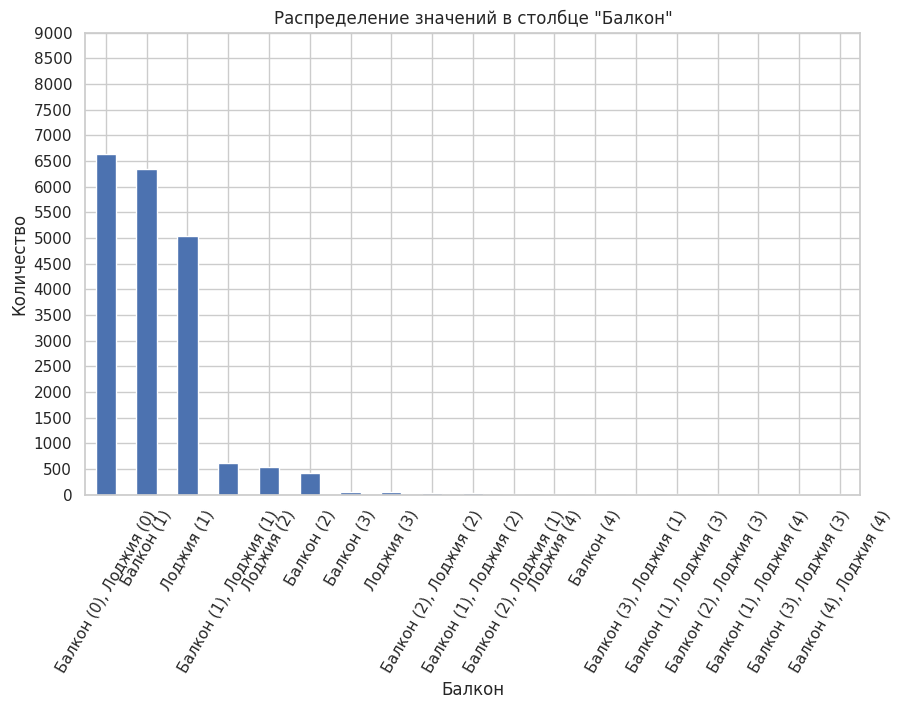

In [317]:
# Корректируем колонку "Балкон". Присваеваем значениям nan значение 'Балкон (0), Лоджия (0)'
realty_df['Балкон'] = realty_df['Балкон'].fillna('Балкон (0), Лоджия (0)')
balcony_counts = realty_df['Балкон'].value_counts()

# Строим гистограмму
plt.figure(figsize=(10, 6))
balcony_counts.plot(kind='bar')
plt.title('Распределение значений в столбце "Балкон"')
plt.xlabel('Балкон')
plt.ylabel('Количество')
plt.xticks(rotation=60)
# Устанавливаем шаги на шкале у
plt.yticks(range(0, 9001, 500))
plt.show()

#График отражает, что в большинстве квартир имеются от 1 до 3 балконов или от 1 до 3 лоджии,
# остальные комбинации можно считать выбросами. Данные будут преобразованы на шаге Релиз 3.

**6. Окна**

In [318]:
unique_values = realty_df['Окна'].unique()
print(unique_values)

[nan 'На улицу и двор' 'Во двор' 'На улицу']


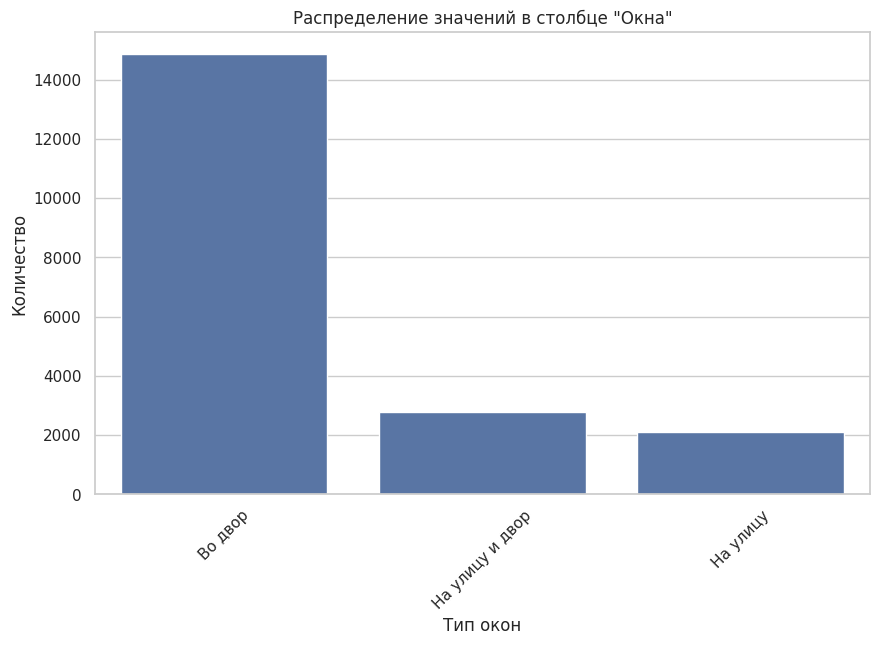

In [319]:
# Корректируем колонку "Окна". Присваеваем значениям nan значение 'Во двор'.
realty_df['Окна'] = realty_df['Окна'].fillna('Во двор')
# Подсчитываем количество значений в столбце "Окна"
window_counts = realty_df['Окна'].value_counts()

# Создаем график с Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=window_counts.index, y=window_counts.values)
plt.title('Распределение значений в столбце "Окна"')
plt.xlabel('Тип окон')
plt.ylabel('Количество')
plt.xticks(rotation=45)

plt.show()

**7. Санузел**

In [320]:
unique_values = realty_df['Санузел'].unique()
print(unique_values)

[nan 'Совмещенный (2), Раздельный (1)' 'Совмещенный (3)' 'Совмещенный (2)'
 'Совмещенный (1), Раздельный (1)' 'Совмещенный (1)'
 'Совмещенный (2), Раздельный (2)' 'Раздельный (2)' 'Раздельный (1)'
 'Раздельный (3)' 'Совмещенный (4)' 'Совмещенный (3), Раздельный (1)'
 'Раздельный (4)' 'Совмещенный (1), Раздельный (2)'
 'Совмещенный (2), Раздельный (4)' 'Совмещенный (1), Раздельный (3)'
 'Совмещенный (3), Раздельный (3)' 'Совмещенный (4), Раздельный (2)'
 'Совмещенный (2), Раздельный (3)' 'Совмещенный (4), Раздельный (1)'
 'Совмещенный (3), Раздельный (2)']


<Figure size 1200x600 with 0 Axes>

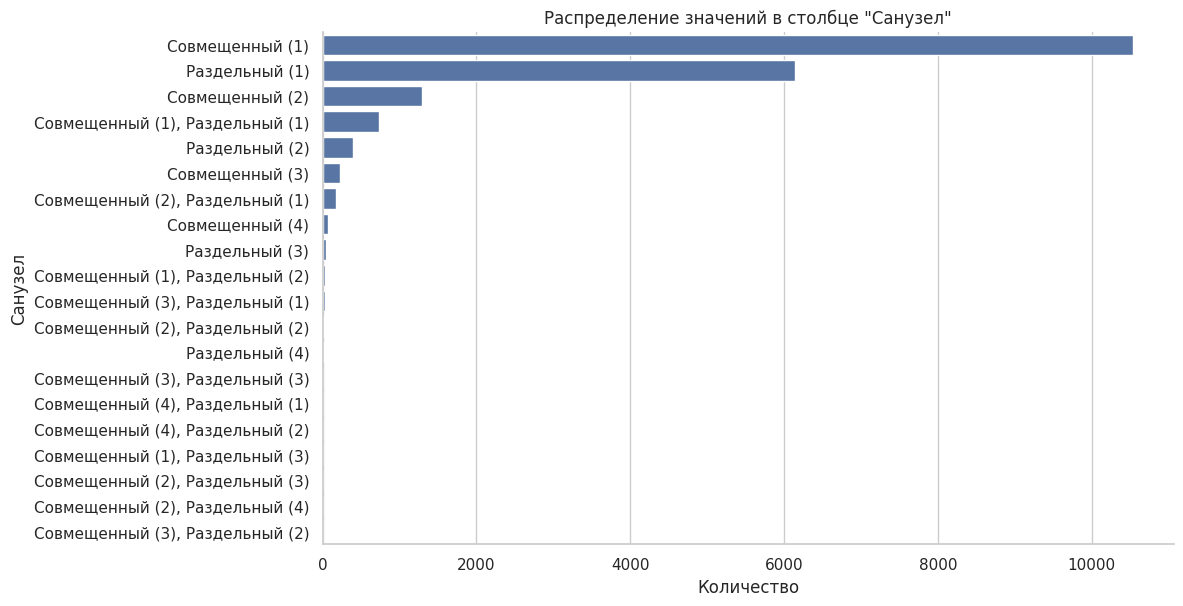

In [321]:
# Корректируем колонку "Санузел". Присваеваем значениям nan значение 'Совмещенный (1)'.
realty_df['Санузел'] = realty_df['Санузел'].fillna('Совмещенный (1)')
wc_counts = realty_df['Санузел'].value_counts()

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Устанавливаем стиль графика
sns.catplot(x="count", y="Санузел", data=wc_counts.reset_index(), kind="bar", height=6, aspect=2)

plt.title('Распределение значений в столбце "Санузел"')
plt.xlabel('Количество')
plt.ylabel('Санузел')
plt.xticks(rotation=0);

# plt.show()

# График отражает выбросы, которые будут удалены на этапе Релиз 3.

**8. Дети/животные**

In [322]:
unique_values = realty_df['Можно с детьми/животными'].unique()
print(unique_values)

['Можно с детьми, Можно с животными' 'Можно с детьми' 'Можно с животными'
 nan]


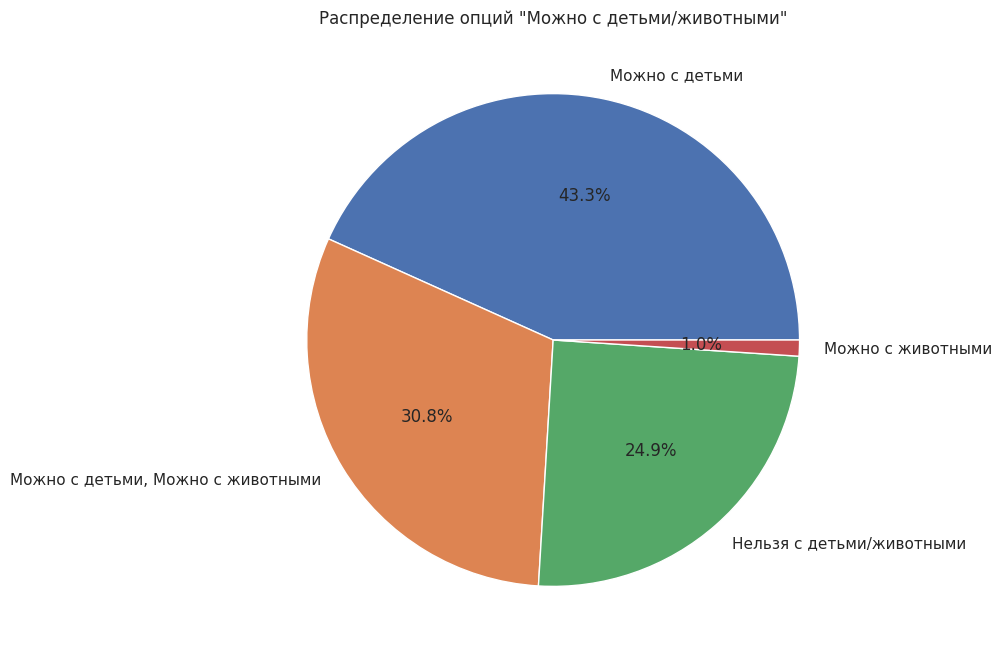

In [323]:
# Корректируем колонку "Можно с детьми/животными". Присваеваем значениям nan значение 'Нельзя с детьми/животными', т.к. согласно анализу жвых объявлений на ЦИАН именно это и означает отсутствие информации о разрешенных жильцах помимо взрослых
realty_df['Можно с детьми/животными'] = realty_df['Можно с детьми/животными'].fillna('Нельзя с детьми/животными')
options = realty_df['Можно с детьми/животными'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(options, labels=options.index, autopct='%1.1f%%')
plt.title('Распределение опций "Можно с детьми/животными"')
plt.show()

**9. Дополнительно**

In [324]:
unique_values = realty_df['Дополнительно'].unique()

In [325]:
#  Создаем словарь, определяющий соответствие между столбцами и значениями для разбивки столбца "Дополнительно"

value_mapping = {
    1: 'Мебель на кухне',
    2: 'Ванна',
    3: 'Душевая кабина',
    4: 'Стиральная машина',
    5: 'Кондиционер',
    6: 'Посудомоечная машина',
    7: 'Телевизор',
    8: 'Холодильник',
    9: 'Интернет',
    10: 'Телефон'
}

# Создаем новые столбцы, используя словарь для соответствия
for i in range(1, 11):
    col_name = str(i)
    realty_df[col_name] = realty_df['Дополнительно'].apply(lambda x: value_mapping[i] if isinstance(x, str) and value_mapping[i] in x else '0')

# Уберите столбец 'Дополнительно', если он больше не нужен
realty_df = realty_df.drop('Дополнительно', axis=1)
realty_df.head(5)



,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,1,2,3,4,5,6,7,8,9,10
0,271271157,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон
1,271634126,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,0
2,271173086,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",200.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон
3,272197456,4.0,Квартира,Смоленская,"Москва, переулок Плотников, 21С1",170.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон
4,273614615,2.0,Квартира,Арбатская,"Москва, улица Новый Арбат, 15",58.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,0,Посудомоечная машина,Телевизор,Холодильник,Интернет,0


In [326]:
# Создаем словарь с новыми именами столбцов
new_column_names = {
    '1': 'Мебель на кухне',
    '2': 'Ванна',
    '3': 'Душевая кабина',
    '4': 'Стиральная машина',
    '5': 'Кондиционер',
    '6': 'Посудомоечная машина',
    '7': 'Телевизор',
    '8': 'Холодильник',
    '9': 'Интернет',
    '10': 'Телефон'
}

# Переименуем столбцы с использованием метода .rename()
realty_df = df.rename(columns=new_column_names)
realty_df.head(3)


,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон
0,271271157,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон
1,271634126,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,0
2,271173086,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",200.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон


По вновь собранным столбцам на этапе релиза 3 и преобразовании всех столбцов датасета буду отрждать зависимости наличия корреляции между наличием этих 'amenities' и ценой аренды.

**10. Парковка**

In [327]:
realty_df['Парковка'].fillna('уличная', inplace=True) #пропущенные значения заполняются уличной парковкой, т.к. по опыту отсутствие указанной парковки как раз означает отсутствие возможности припарковать ТС внутри дома или территории
realty_df.rename(columns={'Парковка': 'parking'}, inplace=True)
realty_df['parking'].value_counts()

parking
уличная           11174
наземная           5283
подземная          2466
открытая            713
многоуровневая      100
на крыше              1
Name: count, dtype: int64

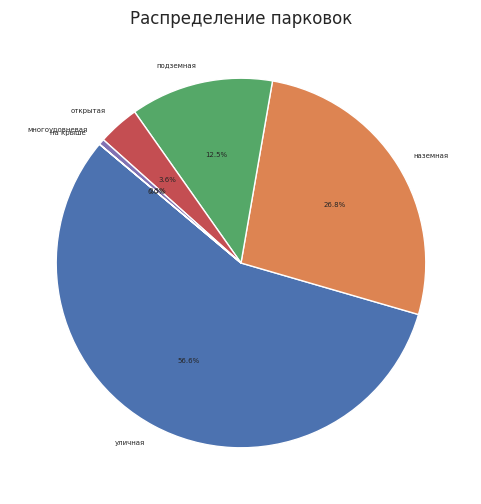

In [328]:
parking_counts = realty_df['parking'].value_counts()
# Создание пай-чарта
plt.figure(figsize=(6, 6))
plt.pie(parking_counts, labels=parking_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 5})
# Добавление заголовка
plt.title('Распределение парковок')
# Отображение пай-чарта
plt.show()

**11. Мусоропровод**

In [329]:
realty_df['Мусоропровод'].value_counts()

Мусоропровод
Да     10262
Нет     1468
Name: count, dtype: int64

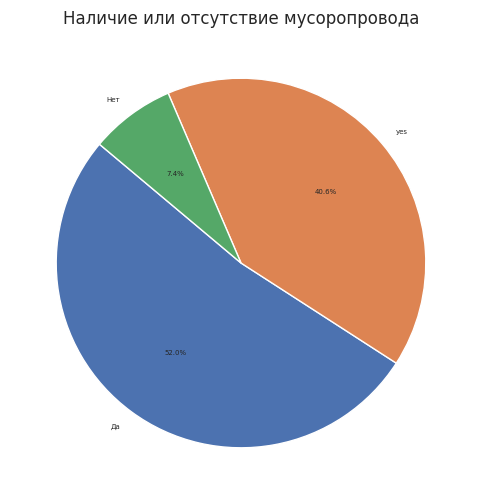

In [330]:
realty_df['Мусоропровод'].fillna('yes', inplace=True) #пропущенные значения заполняются модой, т.к. у мусоропровода есть два состояния — либо он если, либо его нет, и в данной выборке получается, что более 50% выборки с мусоропроводами — получается, что дефолтное состояние дома в Москве — наличие мусоропровода
realty_df.rename(columns={'Мусоропровод': 'garbage_chute'}, inplace=True)
count_chute = realty_df['garbage_chute'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(count_chute, labels=count_chute.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 5})
plt.title('Наличие или отсутствие мусоропровода')
plt.show()

**12. Дом**

In [331]:
realty_df['Этажность'] = realty_df['Дом'].str.extract(r'/(\d+)').astype(int) # делаем отдельную колонку с этажностью домов. Согласно законадательству, в доме обязан быть лифт, если в доме больше 5 этажей
# Задаются англоязычные значения, потому что на данном этапе определить, какого конкретно типа должен быть лифт, невозможно + для того, чтобы видеть, какие конкретно данные были изменены
realty_df['Лифт'] = np.where((realty_df['Этажность'] > 5) & (realty_df['Лифт'].isna()), 'Yes', realty_df['Лифт']) # если в доме больше 5 этажей, в нём обязан быть лифт
realty_df['Лифт'] = np.where((realty_df['Этажность'] <= 5) & (realty_df['Лифт'].isna()), 'No', realty_df['Лифт']) # если в доме меньше 5 этажей, в нём может не быть лифта
realty_df

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,parking,Цена,Телефоны,...,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон,Этажность
0,271271157,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон,16
1,271634126,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,0,16
2,271173086,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",200.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон,16
3,272197456,4.0,Квартира,Смоленская,"Москва, переулок Плотников, 21С1",170.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон,6
4,273614615,2.0,Квартира,Арбатская,"Москва, улица Новый Арбат, 15",58.0,"12/26, Панельный",уличная,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,Ванна,Душевая кабина,Стиральная машина,0,Посудомоечная машина,Телевизор,Холодильник,Интернет,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,1.0,Квартира,Говорово,"Москва, Боровское шоссе, 2к7",35.0,10/14,уличная,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,...,Ванна,0,Стиральная машина,Кондиционер,0,0,Холодильник,Интернет,0,14
23364,274654844,1.0,Квартира,Солнцево,"Москва, Производственная улица, 8к1",38.7,"5/18, Монолитный",уличная,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,...,Ванна,0,Стиральная машина,0,0,Телевизор,Холодильник,0,0,18
23365,268679909,2.0,Квартира,Солнцево,"Москва, Боровский проезд, 11",43.0,"5/5, Кирпичный",уличная,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,...,0,Душевая кабина,Стиральная машина,Кондиционер,0,0,Холодильник,Интернет,0,5
23366,274807525,2.0,Квартира,Солнцево,"Москва, улица Богданова, 6к1",52.5,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79660611965,...,Ванна,0,Стиральная машина,Кондиционер,Посудомоечная машина,0,Холодильник,0,0,23


In [332]:
realty_df['Материал дома'] = realty_df['Дом'].str.split(',').str[1].str.strip()
df_material = realty_df.dropna(subset=['Материал дома'])
mean_heights = df_material.groupby('Материал дома')['Высота потолков, м'].mean().reset_index() # берем материал дома в качестве коррелирующей с высотой потолков переменной, создаём словарь из средних значений для каждого из материалов
count_per_material = df_material['Материал дома'].value_counts().reset_index()
result_df = pd.merge(count_per_material, mean_heights, on='Материал дома')
# создаём новый датафрейм без значений NaN в колонке "Материал дома"
df_material = realty_df.dropna(subset=['Материал дома'])
mean_heights_dict = dict(zip(result_df['Материал дома'], result_df['Высота потолков, м']))
# заполняем пропущенные значения в столбце 'Высота потолков, м' средними значениями из словаря. Здесь пока заполняем только те строки, в которых есть материал дома
realty_df['Высота потолков, м'] = realty_df.apply(lambda row: mean_heights_dict.get(row['Материал дома']) if pd.isna(row['Высота потолков, м']) else row['Высота потолков, м'], axis=1)
realty_df['Высота потолков, м'].isnull().sum() #Здесь количество NaN уже снизилось с 9022 до 2018. Нужно заполнить только оставшиеся Nan в высоте потолков

2018

In [333]:
material_counts = realty_df['Материал дома'].value_counts().reset_index()
material_counts.columns = ['Материал дома', 'Количество']
material_counts

,Материал дома,Количество
0,Панельный,6679
1,Кирпичный,3696
2,Монолитный,3615
3,Блочный,1689
4,Монолитно-кирпичный,872
5,Сталинский,141
6,старый фонд,68
7,Деревянный,5
8,Щитовой,1


In [334]:
#так как мы используем для определения высоты потолков материал дома, а в оставшихся пустых значенииях по высоте потолков нулевым также является и материал дома, то оставшиеся пропуски заполняются просто средним значением
mean_height = realty_df['Высота потолков, м'].mean()
realty_df['Высота потолков, м'] = realty_df['Высота потолков, м'].fillna(mean_height)
realty_df['Высота потолков, м'].isnull().sum() # тут нулевое количество пропусков

0

In [335]:
realty_df = realty_df.drop("Материал дома", axis=1)
#мы не нашли, каким образом нам может помочь серия дома, потому что данных слишком мало и слишком много типов этих серий домов, поэтому серию дома мы просто удаляем
realty_df = realty_df.drop("Серия дома", axis=1)
nan_count = realty_df.isna().sum()
nan_count 

ID  объявления                  0
Количество комнат               0
Тип                             0
Метро                         334
Адрес                           0
Площадь, м2                     0
Дом                             0
parking                         0
Цена                            0
Телефоны                        0
Описание                        0
Ремонт                          0
Балкон                          0
Окна                            0
Санузел                         0
Можно с детьми/животными        0
Название ЖК                 15281
Высота потолков, м              0
Лифт                            0
garbage_chute                   0
Ссылка на объявление            0
monthly_payment                 0
currency                        0
Мебель на кухне                 0
Ванна                           0
Душевая кабина                  0
Стиральная машина               0
Кондиционер                     0
Посудомоечная машина            0
Телевизор     

**13. ЖК**

In [336]:
# ЦИАН автоматически присваивает название ЖК тем домам, которые находятся по адресу определенного ЖК, поэтому мы можем быть уверены: если в ЖК NaN, то дом просто не входит в состав ЖК
realty_df['Название ЖК'] = realty_df['Название ЖК'].replace({pd.NA: 0})
realty_df['Название ЖК'] = realty_df['Название ЖК'].apply(lambda x: 1 if x != 0 else 0)
# если нужно перевести значения в тип int (целые числа):
# df['Название ЖК'] = df['Название ЖК'].astype(int)

## Итоги

In [339]:
nan_count = realty_df.isna().sum()
nan_count 

ID  объявления              0
Количество комнат           0
Тип                         0
Метро                       0
Адрес                       0
Площадь, м2                 0
Дом                         0
parking                     0
Цена                        0
Телефоны                    0
Описание                    0
Ремонт                      0
Балкон                      0
Окна                        0
Санузел                     0
Можно с детьми/животными    0
Название ЖК                 0
Высота потолков, м          0
Лифт                        0
garbage_chute               0
Ссылка на объявление        0
monthly_payment             0
currency                    0
Мебель на кухне             0
Ванна                       0
Душевая кабина              0
Стиральная машина           0
Кондиционер                 0
Посудомоечная машина        0
Телевизор                   0
Холодильник                 0
Интернет                    0
Телефон                     0
Этажность 

In [340]:
realty_df.columns = ['ID', 'number_of_rooms', 'type', 'metro', 'adress',
       'size', 'building', 'parking', 'price', 'phone_number', 'description',
       'refurbishment', 'balcony', 'window', 'bathroom', 'allow_pets_children',
       'residential_complex', 'ceiling_height', 'elevator', 'garbage_chute',
       'link', 'monthly_payment', 'currency',
       'kitchen_furniture', 'bath', 'shower', 'washing_machine',
       'air_conditioner', 'dishwasher', 'television', 'fridge',
       'internet', 'telephone', 'floor']


In [341]:
realty_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19737 entries, 0 to 23367
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   19737 non-null  int64  
 1   number_of_rooms      19737 non-null  float64
 2   type                 19737 non-null  object 
 3   metro                19737 non-null  object 
 4   adress               19737 non-null  object 
 5   size                 19737 non-null  float64
 6   building             19737 non-null  object 
 7   parking              19737 non-null  object 
 8   price                19737 non-null  object 
 9   phone_number         19737 non-null  object 
 10  description          19737 non-null  object 
 11  refurbishment        19737 non-null  object 
 12  balcony              19737 non-null  object 
 13  window               19737 non-null  object 
 14  bathroom             19737 non-null  object 
 15  allow_pets_children  19737 non-null  obje

In [342]:
realty_df.to_csv('full_data.csv')